***
# Tasks 2020
***

These are my solutions to the Tasks assessment for the module Machine Learning and Statistics at GMIT. The author is Alexandra Macuga (G00376287@gmit.ie).

***
### Task 1: Calculate a square root
***

#### Instructions
***

Write a Python function called **sqrt2** that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.

By the standard library, we mean the modules and packages that come as standard with Python. Anything built-in that can be used without an import statement can be used.

#### Research
***

In mathematics, a square root of a number $x$ is a number $y$ such that $y2 = x$, in other words, a number $y$ whose square (the result of multiplying the number by itself, or $y$ * $y$) is $x$.[1] 

The square root of 2, or the one-half power of 2, written in mathematics as $ \sqrt{2} $ or $ 2^{1/2} $ is the positive algebraic number that, when multiplied by itself, equals the number 2.[2] Technically, it must be called the principal square root of 2, to distinguish it from the negative number with the same property.

![geometrically](img/img2.png)

Geometrically, the square root of 2 is the length of a diagonal across a square with sides of one unit of length;[2] this follows from the Pythagorean theorem. It was probably the first number known to be irrational.[2] The fraction $ \frac{99} {70} (\approx 1.4142857)$ is sometimes used as a good rational approximation with a reasonably small denominator.

We can calculate the square root of number using Newton's method [3, 4]. To find the square root $z$ of a number $x$, we can iterate using the following equation.

$$ z = z - \frac{z^2 - x} {2z} $$


[1] Wikipedia; Square root; https://en.wikipedia.org/wiki/Square_root

[2] Wikipedia; Square root of 2; https://en.wikipedia.org/wiki/Square_root_of_2

[3] A Tour of Go; Exercise: Loops and Functions; https://tour.golang.org/flowcontrol/8

[4] Wikipedia; Newton's method; https://en.wikipedia.org/wiki/Newton%27s_method


#### Solution
***

First, we try to calculate the square root of two using Newton's method.

In [1]:
# A function to calculate the square root of a number 2 using Newton's method.

def sqrt1():
    # Initial guess for the square root z using normal division.
    z = 2 / 2
    # Loop until we're happy with the accuracy.
    while abs(2 - (z * z)) > 0.000001:
        # Calculate a better guess for the square root.
        z -= (z*z - 2) / (2 * z)
    # Return the (approximate) square root of 2 to 100 decimal places.
    z = ("%.100f" % z)
    return z

In [2]:
# Test the function sqrt1.
sqrt1()

'1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000'

We can see that the result is not very precise. As per Python documentation, unfortunately, most decimal fractions cannot be represented exactly as binary fractions. A consequence is that, in general, the decimal floating-point numbers you enter are only approximated by the binary floating-point numbers actually stored in the machine.[5] We need to modify our **sqrt1** function if we want to see more precise result by using integers in our calculation.

In [3]:
# A function to calculate the square root of a number 2 using modified method.
# Adapted from: https://stackoverflow.com/q/64295245

def sqrt2():
    # Multiple 2 by 10*200
    x = 2 * 10 **200
    # Initial guess for the square root z using floor division.
    z = x // 2
    # Loop until we're happy with the accuracy
    while (x - (z ** 2)) < 0.000001:
        # Calculate a better guess for the square root.
        z = (z + x // z) // 2
    # Return the (approximate) square root of 2 to 100 decimal places as a string.
    z = (str(z))
    # Return the first character followed by fullstop and the rest of the characters
    z = (z[0] + "." + z[1:])
    return z

In [4]:
# Test the function sqrt2.
sqrt2()

'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727'

[5] The Python Tutorial; Floating Point Arithmetic: Issues and Limitations; https://docs.python.org/3/tutorial/floatingpoint.html

#### Compare the functions
***

Here we compare the functions to see which will give us more precise answer. We also want to check, if any of the functions will return the same number.

In [5]:
# Return square root of 2 to 100 decimal places using my functions sqrt1 sqrt2 and imported modules
# Adapted from: https://stackoverflow.com/a/4733196

import math
from decimal import *

a =  sqrt1()

b = sqrt2()

c = math.sqrt(2)
# Format variable c to 100 decimal places
c = format(c, '.100f')

# Set the precision to 101 
getcontext().prec = 101
d = Decimal(2).sqrt()

print("Sqrt1: ", a, "\n", "Sqrt2: ", b,  "\n", "Math: ", c, "\n", "Decimal: ", d)

Sqrt1:  1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000 
 Sqrt2:  1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727 
 Math:  1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000 
 Decimal:  1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [6]:
# Check if any of the results are the same number
if a == b:
    print ("sqrt1 = sqrt2")
elif a == c: 
    print("sqrt1 = math") 
elif a == d:
    print("sqrt1 = decimal")
elif b == c:
    print("sqrt2 = math")
elif b == d:
    print ("sqrt2 = decimal")
elif c == d:
    print("math = decimal")
else:
    print("No matching results")

No matching results


Even though it looks like the square root of 2 is the same number when using sqrt2 function and decimal module, we are told that there are no matching results. We need to check if all our variables are the same type, because that might cause this unexpected result.

In [7]:
# Print the types of our variables 
print (type(a))
print (type(b))
print (type(c))
print (type(d))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'decimal.Decimal'>


Our first three variables are strings, but the last one is decimal. We change the type of variable d to string.

In [8]:
# Change the type of variable d from decimal to string.
d = str(d)

In [9]:
# Check if any of the results are the same number
if a == b:
    print ("sqrt1 = sqrt2")
elif a == c: 
    print("sqrt1 = math") 
elif a == d:
    print("sqrt1 = decimal")
elif b == c:
    print("sqrt2 = math")
elif b == d:
    print ("sqrt2 = decimal")
elif c == d:
    print("math = decimal")
else:
    print("No matching results")

sqrt2 = decimal


Our function is working properly, the sqrt2 function returns the same square root of 2 as the decimal module. 

***
### Task 2: The Chi-squared test
***

#### Instructions
***

The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [6], stating the Chi-squared value based on it is approximately *24.6*. Use **scipy.stats** to verify this value and calculate the associated *p* value. You should include a short note with references justifying your analysis in a markdown cell.

![Table](img/img1.png)

[6] Wikipedia contributors, “Chi-squared test — Wikipedia, the free encyclopedia,” 2020, [Online; accessed 1-November-2020]. [Online]. Available: https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096

#### Research
***

**Pearson’s Chi-Squared Test**

$ \chi ^{2} $

It is the most widely used of many chi-squared tests. Its properties were first investigated by Karl Pearson in 1900. Pearson's chi-squared test is used to assess three types of comparison: goodness of fit, homogeneity, and independence.[7]

A chi-squared test for independence compares two variables in a contingency table to see if they are related. In a more general sense, it tests to see whether distributions of categorical variables differ from each another.

* A very small chi square test statistic means that your observed data fits your expected data extremely well. In other words, there is a relationship.

* A very large chi square test statistic means that the data does not fit very well. In other words, there isn’t a relationship.[8]

The computational procedure includes the following steps:

1. Calculate the chi-squared test statistic, $ \chi ^{2} $ , which resembles a normalized sum of squared deviations between observed and theoretical frequencies (see below).
2. Determine the degrees of freedom, $ df $, of that statistic.
* For test of independence,  $ df = (Rows − 1)×(Cols − 1) $, where in this case, $ Rows $ corresponds to number of categories in one variable, and $ Cols $ corresponds to number of categories in the second variable.
3. Select a desired level of confidence (significance level, p-value or the corresponding alpha level) for the result of the test.
4. Compare $ \chi ^{2} $ to the critical value from the chi-squared distribution with $ df $ degrees of freedom and the selected confidence level (one-sided since the test is only one direction, i.e. is the test value greater than the critical value?), which in many cases gives a good approximation of the distribution of $ \chi ^{2} $.
5. Sustain or reject the null hypothesis that the observed frequency distribution is the same as the theoretical distribution based on whether the test statistic exceeds the critical value of $ \chi ^{2} $. If the test statistic exceeds the critical value of $ \chi ^{2} $, the null hypothesis ($ H_{0} $ = there is no difference between the distributions) can be rejected, and the alternative hypothesis ($ H_{1} $ = there is a difference between the distributions) can be accepted, both with the selected level of confidence. If the test statistic falls below the threshold $ \chi ^{2} $ value, then no clear conclusion can be reached, and the null hypothesis is sustained (we failed to reject the null hypothesis), but not necessarily accepted.[7]

The Pearson’s chi-squared test for independence can be calculated in Python using the *chi2_contingency()* SciPy function.[9]

***scipy.stats.chi2_contingency***

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence. The number of degrees of freedom is (expressed using numpy functions and attributes) :

$$ dof = observed.size - sum(observed.shape) + observed.ndim - 1 $$

**Parameters**:
* *observed*: array_like

The contingency table. The table contains the observed frequencies (i.e. number of occurrences) in each category. In the two-dimensional case, the table is often described as an “R x C table”.

* *correction*: bool, optional

If True, and the degrees of freedom is 1, apply Yates’ correction for continuity. The effect of the correction is to adjust each observed value by 0.5 towards the corresponding expected value.

* *lambda*: _float or str, optional.

By default, the statistic computed in this test is Pearson’s chi-squared statistic [2]. lambda_ allows a statistic from the Cressie-Read power divergence family [3] to be used instead. See power_divergence for details.

**Returns**:
* *chi2*: float

The test statistic.

* *p*: float

The p-value of the test

* *dof*: int

Degrees of freedom

* *expected*: ndarray, same shape as observed

The expected frequencies, based on the marginal sums of the table.[10]

[7] Wikipedia; Pearson's chi-squared test; https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

[8] Statistics How To; Chi-Square Statistic: How to Calculate It / Distribution; https://www.statisticshowto.com/probability-and-statistics/chi-square/

[9] Jason Brownlee; A Gentle Introduction to the Chi-Squared Test for Machine Learning; https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

[10] The SciPy community; scipy.stats.chi2_contingency; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

#### Solution
***

**Example chi-squared test for categorical data**

Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification.[6]


<!-- Adapted from https://stackoverflow.com/a/48657695 -->
<!-- As per the reference, the alignment syntax unfortunately does not work currently, but I leave it here in case the bug is fixed-->

|-| A | B | C | D | Total |
|:-|:-|:-:|:-:|:-:|-:|
| White collar | 90 | 60 | 104 | 95 | 349 |
| Blue collar | 30 | 50 | 51 | 20 | 151 |
| No collar | 30 | 40 | 45 | 35 | 150 |
|-|-|-|-|-|-|
| Total | 150 | 150 | 200 | 150 | 650 |

In [10]:
# Adapted from: https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

# Import modules.
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Define and print our contingency table.
table = [ [90, 60, 104, 95],
          [30, 50, 51, 20],
          [30, 40, 45, 35]]
print(table)

# The function takes an array as input representing the contingency table for the two categorical variables. 
# It returns the calculated statistic and p-value for interpretation 
# as well as the calculated degrees of freedom and table of expected frequencies.
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

# Interpret test-statistic.
prob = 0.95
critical = chi2.ppf(prob, dof)
# Print values formatted to two decimal places.
print('probability=%.2f, critical=%.2f, stat=%.2f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# Interpret p-value
alpha = 1.0 - prob
# Print values formatted to two decimal places.
print('significance=%.2f, p=%.2f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]]
dof=6
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]
probability=0.95, critical=12.59, stat=24.57
Dependent (reject H0)
significance=0.05, p=0.00
Dependent (reject H0)


In [11]:
# Print stat value formatted to 1 decimal place.
print("{:.1f}".format(stat))

24.6


In [12]:
# Print p value.
print(p)

0.0004098425861096696


We verify that the Chi-squared value is approximately 24.6. We also calculated the associated p value, which is approximately 0.00041.

Based on our calculations, chi-square test statistic(24,6) is greater than the critical value (12,6), the null hypothesis can be rejected. The interpretation of the p-value makes the same finding, the p-value (0.00041) is less than a significance (0.05), which means that the groups are not similar and the variables are dependent (rejecting the null hypothesis). That means, that each person's neighborhood of residence is dependent of the person's occupational classification.

***
### Task 3: The standard deviation
***

#### Instructions
***

The standard deviation of an array of numbers $x$ is calculated using **numpy** as 

$$ np.sqrt(np.sum((x - np.mean(x))**2)/len(x))$$ 

However, Microsoft Excel has two different versions of the standard deviation calculation, **STDEV.P** and **STDEV.S**. The **STDEV.P** function performs the above calculation but in the **STDEV.S** calculation the division is by $len(x)-1$ rather than $len(x)$. Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use **numpy** to perform a simulation demonstrating that the **STDEV.S** calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.

#### Research
***

Comparison of STDEV.P and STDEV.S. based on the official Office support webpages.[11][12]

| STDEV.P | STDEV.S |
|:-|:-|
| **SIMILARITIES** |
| The standard deviation is a measure of how widely values are dispersed from the average value (the mean). |
| For large sample sizes, STDEV.S and STDEV.P return approximately equal values. |
| Arguments can either be numbers or names, arrays, or references that contain numbers. |
| Logical values, and text representations of numbers that you type directly into the list of arguments are counted. |
| If an argument is an array or reference, only numbers in that array or reference are counted. Empty cells, logical values, text, or error values in the array or reference are ignored. |
| Arguments that are error values or text that cannot be translated into numbers cause errors. |
| **DIFFERENCES** |
| Calculates standard deviation based on the entire population given as arguments (ignores logical values and text). | Estimates standard deviation based on a sample (ignores logical values and text in the sample). |
| The standard deviation is calculated using the "n" method. | The standard deviation is calculated using the "n-1" method. |
| If you want to include logical values and text representations of numbers in a reference as part of the calculation, use the STDEVPA function. | If you want to include logical values and text representations of numbers in a reference as part of the calculation, use the STDEVA function. |
| Uses the following formula: $$\sqrt{\frac{\sum (x-\bar{x})^{2}}{n}}$$ where $x$ is the sample mean AVERAGE(number1, number2,...) and $n$ is the sample size. | Uses the following formula: $$\sqrt{\frac{\sum (x-\bar{x})^{2}}{(n-1)}}$$ where $x$ is the sample mean AVERAGE(number1, number2,...) and $n$ is the sample size |

[11] Office Support; STDEV.P function; https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285

[12] Office Support; STDEV.S function; https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

#### Solution
***
As mentioned above, STDEV.P calculates standard deviation based on the entire population given as arguments and STDEV.S estimates standard deviation based on a sample. I decided to draw samples from a a normal (Gaussian) distribution. I set the standard deviation as 0.1. I compare the results of calculations using STDEV.P and STDEV.S functions in Python.

In [13]:
# Adapted from: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.normal.html

# Import modules
import numpy as np
import matplotlib.pyplot as plt

# Mean and standard deviation.
mu, sigma = 0, 0.1 
# Draw 1000 random samples from the distribution (this is our population).
p = np.random.normal(mu, sigma, 1000)
# Draw 50 random samples from our population
s = np.random.choice(p, 50)

# Display the histogram
count, bins, ignored = plt.hist(p, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
# Estimate the standard deviation of the sample of the population using len(s).
sample_p = np.sqrt(np.sum((s - np.mean(s))**2)/len(s))
print('len(s):' ,sample_p)

# Estimate the standard deviation of the sample of the population using len(s)-1.
sample_s = np.sqrt(np.sum((s - np.mean(s))**2)/(len(s)-1))
print('len(s)-1:',sample_s)

len(s): 0.1022474269957529
len(s)-1: 0.1032854985536762


As we can see above, the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. To confirm our findings, I use numpy.std function to estimate the standard deviation of a population and standard deviationf of a sample of a population.[13]

In [15]:
# This calculates the population standard deviation. 
n1 = np.std(p)

# This calculates the standard deviation of sample of population using the sample variance.
n2 = np.std(s, ddof=1)

print('population_p:', n1 )
print('sample_s:' ,n2 )

population_p: 0.09953565953880726
sample_s: 0.1032854985536762


[13] StackOverflow; Is there any difference between numpy.std and excel STDEV function?; https://stackoverflow.com/a/34134033

***
### Task 4: Make predictions
***

#### Instructions
***

NB – when I first posted this task, I accidentally wrote “*k*-means” where I meant to write “*k*NN” for *k* Nearest Neighbours. Because of this, I will allow either algorithm to be used and have extended the deadline by two weeks. 

Use **scikit-learn** to apply *k* Nearest Neighbours clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.

#### Research
***
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher (1890-1962) in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis". It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[14]

![iris_species](img/img3.png)

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample. The dataset contains a set of 150 records under 5 attributes:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. species:
    * Iris Setosa
    * Iris Versicolour
    * Iris Virginica

The Iris data set is widely used as a beginner's dataset for machine leaning purpose. This dataset is free and is publicly available at the UCI Machine Learning Repository.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa
Rows, columns: (150, 5)
       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.06          3.76         1.20
std            0.83         0.44          1.77         0.76
min            4.30         2.00

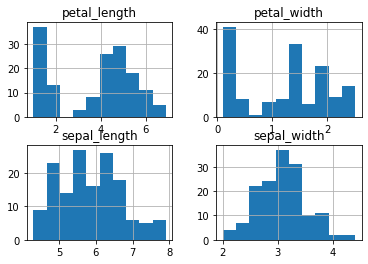

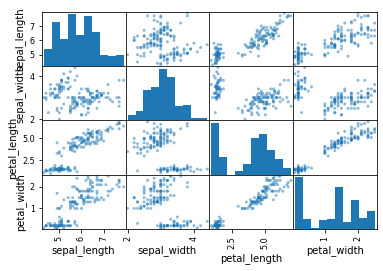

In [16]:
# Load modules
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Load dataset
file = "iris.csv"
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
dataset = pd.read_csv(file, names=features)

# Print first 10 lines of the dataset
print(dataset.head(10))

# Print the number of rows and columns
print("Rows, columns:", dataset.shape)

# For each column, calculate the following values:
# - number of values
# - mean
# - standard deviation
# - minimum
# - lower percentile(25th)
# - median (50th percentile)
# - upper percentile (75th)
# - maximum
describe = dataset.describe()

# Round the results to two decimal places
describe = round(describe, 2)

# Print the results
print(describe)

# Calculate the variance of each column
df = pd.DataFrame(dataset)
df = df.var()

# Round the variance to two decimal places
df = round(df, 2)

# Print the variance
print('Variance: ' '\n' + str(df))

# Create a histogram
dataset.hist()
plt.show()

# Create a scatter plot matrix
scatter_matrix(dataset)
plt.show()

[14] Wikipedia; Iris flower data set; https://en.wikipedia.org/wiki/Iris_flower_data_set

#### Solution
***